In [2]:
# import sys
# !{sys.executable} -m pip install yellowbrick bokeh

In [1]:
#Loading libraries
import scimap as sm
import anndata as ad
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from joblib import Parallel, delayed
import scipy
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import multiprocessing as mp
import seaborn as sns
from bokeh.plotting import figure, output_file, show 
from bokeh.palettes import Category10, Category20, Category20b, Category20
import umap as um

# Reading input data

In [3]:
adata = sm.pp.mcmicro_to_scimap("D:/users/fperez/NKI_TMAs_AF/Tables/All_cells_scimap-format_columns-reduced_20231028.csv",
                                remove_dna=False, remove_string_from_name=None, log=False, drop_markers=None,
                                random_sample=None, unique_CellId=False, CellId='CellId', split='Area',
                                custom_imageid=None, min_cells=None, output_dir=None)

Loading All_cells_scimap-format_columns-reduced_20231028.csv


In [5]:
adata.obs['GlobalCellType'].unique()

array(['Stromal', 'Cancer', 'Other.MY', 'CD8.T.cells', 'Other',
       'CD4.T.cells', 'CD31.stromal', 'T.regs', 'CD207.MY', 'CD15.MY',
       'CD163.MP', 'CD11c.MY', 'CD68.MP', 'B.cells', 'Other.immune'],
      dtype=object)

# Counting proportion of neighboring cells by celltype

In [6]:
#For radious of 46px (30microns)
adata = sm.tl.spatial_count(adata, x_coordinate='X_position', y_coordinate='Y_position',
                            phenotype='GlobalCellType', method='radius', radius=46,
                            subset=None, label='spatial_count_46')

#For radious of 92px (60microns)
adata = sm.tl.spatial_count(adata, x_coordinate='X_position', y_coordinate='Y_position',
                            phenotype='GlobalCellType', method='radius', radius=92,
                            subset=None, label='spatial_count_92')

#For radious of 138px (90microns)
adata = sm.tl.spatial_count(adata, x_coordinate='X_position', y_coordinate='Y_position',
                            phenotype='GlobalCellType', method='radius', radius=138,
                            subset=None, label='spatial_count_138')

Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 46 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours within 92 pixels of every cell
Identifying neighbours withi

Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifyin

Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifyin

Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifyin

Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifyin

Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifyin

Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifying neighbours within 138 pixels of every cell
Identifyin

In [7]:
adata.uns['spatial_count_46']

neighbour_phenotype,CD11c.MY,CD15.MY,CD163.MP,CD207.MY,CD31.stromal,CD4.T.cells,CD68.MP,CD8.T.cells,Cancer,Other,Other.MY,Stromal,T.regs,B.cells,Other.immune
CellId,,,,,,,,,,,,,,,
TMA_18_810_core1_c1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.000000,0.888889,0.0,0.0,0.0
TMA_18_810_core1_c2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0
TMA_18_810_core1_c3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.000000,0.666667,0.0,0.0,0.0
TMA_18_810_core1_c4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0
TMA_18_810_core1_c5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.000000,0.888889,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMA_46_325_core9_c4640,0.071429,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000,0.142857,0.0,0.071429,0.571429,0.0,0.0,0.0
TMA_46_325_core9_c4641,0.000000,0.0,0.250000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.750000,0.0,0.0,0.0
TMA_46_325_core9_c4642,0.071429,0.0,0.071429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.071429,0.785714,0.0,0.0,0.0


In [8]:
#Saving spatial interaction proportions
kclust = adata.uns['spatial_count_46']
kclust.to_csv("D:/users/fperez/NKI_TMAs_AF/Tables/Spatial-cell-proportions_radious46px.csv")

#Saving spatial interaction proportions
kclust = adata.uns['spatial_count_92']
kclust.to_csv("D:/users/fperez/NKI_TMAs_AF/Tables/Spatial-cell-proportions_radious92px.csv")

#Saving spatial interaction proportions
kclust = adata.uns['spatial_count_138']
kclust.to_csv("D:/users/fperez/NKI_TMAs_AF/Tables/Spatial-cell-proportions_radious138px.csv")

# Calculating best number of clusters by k-means using elbow curve

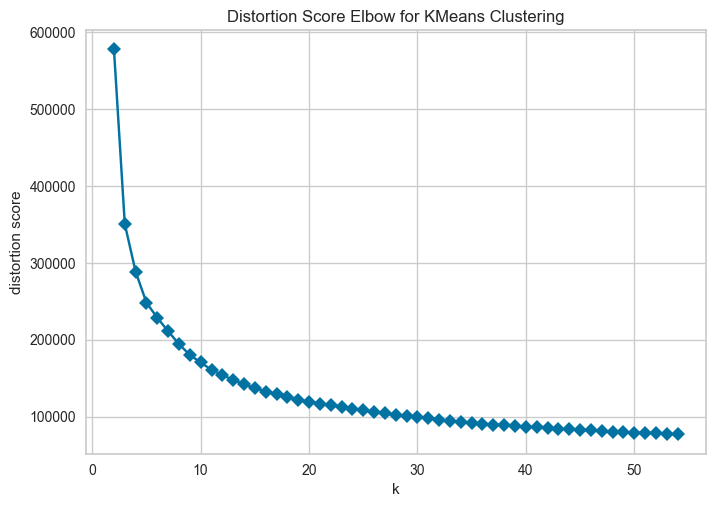

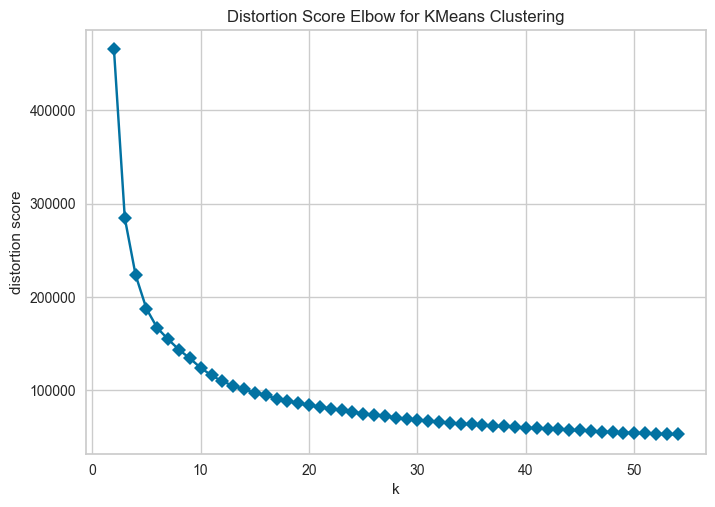

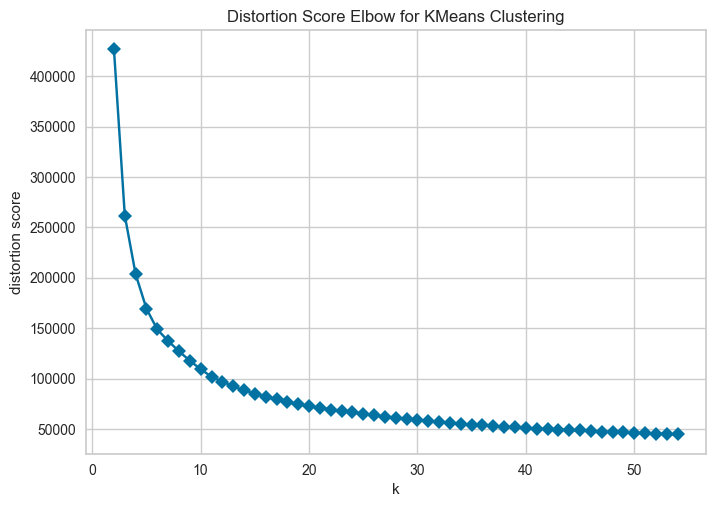

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#For 46px
km = KMeans(random_state=42)
visualizer1 = KElbowVisualizer(km, k=(2,55), timings=False, metric='distortion', locate_elbow=False)
visualizer1.fit(adata.uns['spatial_count_46'].fillna(0))        # Fit the data to the visualizer
visualizer1.show()        # Finalize and render the figure


#For 92px
km = KMeans(random_state=42)
visualizer2 = KElbowVisualizer(km, k=(2,55), timings=False, metric='distortion', locate_elbow=False)
visualizer2.fit(adata.uns['spatial_count_92'].fillna(0))        # Fit the data to the visualizer
visualizer2.show()        # Finalize and render the figure


#For 138px
km = KMeans(random_state=42)
visualizer3 = KElbowVisualizer(km, k=(2,55), timings=False, metric='distortion', locate_elbow=False)
visualizer3.fit(adata.uns['spatial_count_138'].fillna(0))        # Fit the data to the visualizer
visualizer3.show()        # Finalize and render the figure

# Performing clustering of cell-neighborhood-proportions

In [9]:
#For 46px
adata = sm.tl.spatial_cluster (adata, k=30, method = 'kmeans', df_name='spatial_count_46', random_state=42,
                               label='spatial_kmeans_radios46_k30')

#For 92px
adata = sm.tl.spatial_cluster (adata, k=30, method = 'kmeans', df_name='spatial_count_92', random_state=42,
                               label='spatial_kmeans_radios92_k30')

#For 138px
adata = sm.tl.spatial_cluster (adata, k=30, method = 'kmeans', df_name='spatial_count_138', random_state=42,
                               label='spatial_kmeans_radios138_k30')

Kmeans clustering
Kmeans clustering
Kmeans clustering


In [10]:
##Storing data
kclust = adata.obs['spatial_kmeans_radios46_k30']
kclust.to_csv("D:/users/fperez/NKI_TMAs_AF/Analysis_results/Spatial_analysis/Cluster_ids_radious46_k30_01122023.csv")

kclust = adata.obs['spatial_kmeans_radios92_k30']
kclust.to_csv("D:/users/fperez/NKI_TMAs_AF/Analysis_results/Spatial_analysis/Cluster_ids_radious92_k30_01122023.csv")

kclust = adata.obs['spatial_kmeans_radios138_k30']
kclust.to_csv("D:/users/fperez/NKI_TMAs_AF/Analysis_results/Spatial_analysis/Cluster_ids_radious138_k30_01122023.csv")